In [1]:
from tensorflow.keras.datasets import reuters

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [3]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [4]:
# num_words restricts data to the 10000 most frequently occuring words 

In [5]:
len(train_data),len(test_data)

(8982, 2246)

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
# decoding bact to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

u'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0],len(x_train[0])

(array([0., 1., 1., ..., 0., 0., 0.]), 10000)

In [11]:
train_labels[0]

3

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
one_hot_train_labels,len(one_hot_train_labels),len(one_hot_train_labels[0])

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), 8982, 46)

In [24]:
# there is a built-in way to do this in Keras 
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Building your network

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [28]:


x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [29]:

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 83us/sample - loss: 2.4172 - acc: 0.4907 - val_loss: 1.6206 - val_acc: 0.6410
Epoch 2/20
7982/7982 [==============================] - 0s 58us/sample - loss: 1.3621 - acc: 0.7047 - val_loss: 1.2756 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 0s 57us/sample - loss: 1.0311 - acc: 0.7724 - val_loss: 1.1086 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 1s 64us/sample - loss: 0.8070 - acc: 0.8231 - val_loss: 1.0190 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 64us/sample - loss: 0.6388 - acc: 0.8654 - val_loss: 0.9421 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.5054 - acc: 0.8955 - val_loss: 0.9062 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.4078 - acc: 0.9152 - val_loss: 0.8896 - val_acc: 

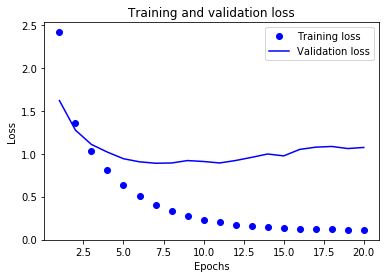

In [31]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


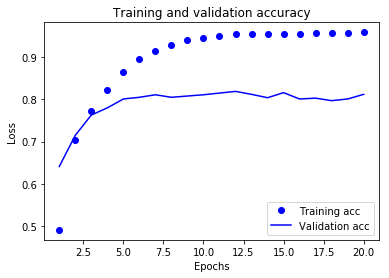

In [32]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# network begins to overfit after nine epochs.
# Let's train a new network from scratch for nine epochs and then evaluate

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 180us/step - loss: 2.5396 - acc: 0.5226 - val_loss: 1.6737 - val_acc: 0.6540

In [26]:
results

[1.0225079348335708, 0.7773820125196835]

In [28]:
predictions = model.predict(x_test)

In [29]:
predictions[0]

array([9.7301972e-06, 8.2284896e-05, 2.3916487e-05, 9.7248036e-01,
       1.6292412e-02, 1.2077223e-07, 9.8231496e-05, 3.2281641e-05,
       3.3448385e-03, 2.0017446e-06, 3.2392167e-05, 1.3436953e-03,
       5.1183491e-05, 2.5898735e-05, 4.9283440e-06, 1.5440422e-05,
       1.0351076e-03, 1.8092056e-04, 2.5379006e-04, 1.1744314e-03,
       7.7239197e-04, 4.3254826e-04, 6.1793939e-06, 6.4572610e-05,
       1.1115582e-05, 3.2849846e-04, 2.2987551e-06, 2.4976716e-05,
       6.0013845e-06, 1.1166301e-04, 3.4966096e-04, 1.8270752e-04,
       1.3313663e-05, 3.8429433e-05, 3.6279165e-05, 1.8634209e-05,
       1.3878793e-04, 4.8571525e-05, 8.5925007e-05, 3.0130646e-04,
       3.3744316e-05, 4.5487456e-04, 1.8297201e-06, 3.5887289e-05,
       5.6151298e-06, 1.0012485e-05], dtype=float32)

In [30]:
np.sum(predictions[0])

0.9999998

In [31]:
np.argmax(predictions[0])

3

In [33]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [34]:
y_train[0]

3

In [35]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 278us/step - loss: 3.1606 - acc: 0.2405 - val_loss: 2.5952 - val_acc: 0.2890

The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional.

# Further Experiments
Try using larger or smaller layers: 32 units, 128 units, and so on.
 You used two hidden layers. Now try using a single hidden layer, or three hid-
den layers.

# Notes
1. If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N .

2. In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.

3. Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.

4. There are two ways to handle labels in multiclass classification:
    – Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
    – Encoding the labels as integers and using the sparse_categorical_crossentropy loss function

5. If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.